# 2.4 微积分
- **目录**
  - 2.4.1 导数和微分
  - 2.4.2 偏导数
  - 2.4.3 梯度
  - 2.4.4 链式法则
  - 2.4.5 雅克比矩阵

- 微分学最重要的应用是**优化问题**，即考虑如何把事情做到最好，此问题在深度学习中是无处不在的。
  - 在深度学习中“训练”模型，不断更新参数，使得模型变得更优。
  - 通常情况下，变得更好意味着最小化某个**损失函数（loss function）**，
  - 即一个衡量**模型有多糟糕**这个问题的分数。
  - 最终生成一个模型，能够在测试数据上表现良好。
  
- “训练”模型只能将模型与我们实际能看到的数据相拟合，可以将拟合模型的任务分解为两个关键问题：
  - **优化（optimization）**：用模型拟合观测数据的过程；
  - **泛化（generalization）**：指导用户生成超出训练模型更好的模型，即有效性更好。

## 2.4.1 导数和微分

- 在深度学习中，通常选择对于模型**参数可微**的损失函数。
- 对于每个参数，如果把这个参数**增加**或**减少**一个无穷小的量，可以知道损失会以多快的速度增加或减少，

- 假设函数$f: \mathbb{R}^n \rightarrow \mathbb{R}$，其输入和输出都是标量。
- 如果$f$的**导数**存在，这个极限被定义为
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$
  - 如果$f'(a)$存在，则称$f$在$a$处是 **可微（differentiable）** 的。
  - 如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。

- **"可微"对于深度学习中的参数更新尤其是权重更新非常重要。**

- **示例：**
  - **定义$u=f(x)=3x^2-4x$**

In [8]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

- **数值微分**法求导数：通过令$x=1$并让$h$接近$0$，上述函数中的$\frac{f(x+h)-f(x)}{h}$的数值结果接近$2$。


In [9]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1 # 将h乘以0.1后赋给h，将h不断向0逼近

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


- 导数的等价符号：
  给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式是等价的：

    $$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

    其中符号$\frac{d}{dx}$和$D$是**微分运算符**，表示**微分**操作。
- 使用以下规则来对常见函数求微分：
  - $DC = 0$（$C$是一个常数）
  - $Dx^n = nx^{n-1}$（**幂律（power rule）**，$n$是任意实数）
  - $De^x = e^x$
  - $D\ln(x) = 1/x$

- 微分法则，假设函数$f$和$g$都是可微的，$C$是一个常数：
  - **常数相乘法则**
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$
  - **加法法则**
$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$
  - **乘法法则**
$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$
  - **除法法则**
$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

  - 按上述法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。
    - 令$x=1$，有$u'=2$，和前面数值微分方法计算的结果一致。
    - 当$x=1$时，此导数也是曲线$u=f(x)$在$x=1$处切线的斜率。

In [10]:
# 设置matplotlib参数，便于更好显示图形
# matplotlib默认每英寸是100像素
def set_figsize(figsize=(3.5, 2.5)): 
    """设置matplotlib的图表大小"""    
    d2l.plt.rcParams['figure.figsize'] = figsize

In [11]:
# 设置坐标轴参数
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel) # x轴的标签
    axes.set_ylabel(ylabel) # y轴的标签
    axes.set_xscale(xscale) # x轴的刻度比例，"linear"（线性）、"log"（对数）
    axes.set_yscale(yscale) # y轴的刻度比例，"linear"（线性）、"log"（对数）
    axes.set_xlim(xlim) # 设置x轴的显示范围，包含两个元素，表示X轴的最小值和最大值
    axes.set_ylim(ylim) # # 设置y轴的显示范围，包含两个元素，表示X轴的最小值和最大值
    if legend:
        axes.legend(legend) # 图例
    axes.grid()

- plot函数是d2l包自带函数：
  - 函数灵活处理**不同维度**的输入数据
  - 支持**多组数据**的绘制（通过循环）
  - 允许自定义多个图形属性
  - 使用 `zip` 函数同时遍历 X、Y 和格式
  - 通过 `axes.plot()` 进行实际的绘图操作

- 线型和颜色：
  - `'-'`:
    - 颜色：默认颜色（通常是蓝色）
    - 线型：实线（solid line）
  - `'m--'`:
    - 颜色：品红色（magenta）
    - 线型：破折线（dashed line）
  - `'g-.'`:
    - 颜色：绿色（green）
    - 线型：点划线（dash-dot line）
  - `'r:'`:
    - 颜色：红色（red）
    - 线型：点线（dotted line）

In [12]:

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    # "gca" 代表 "get current axes"，返回当前活动的坐标轴Axes对象。
    axes = axes if axes else d2l.plt.gca() 

    # 如果X有且只有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    # 如果 X 是一维的，将其转换为二维列表
    if has_one_axis(X):
        X = [X] 
        
    # 如果没有提供 Y，则将 X 视为 Y 值，X 设为空列表
    if Y is None:
        X, Y = [[]] * len(X), X 
        
    # 如果 Y 是一维的，将其转换为二维列表
    elif has_one_axis(Y):
        Y = [Y] 
        
    # 确保 X 和 Y 的长度匹配
    if len(X) != len(Y):
        X = X * len(Y) 
    axes.cla() # 清除当前坐标轴
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

------------
- **说明： `[[]]*len(X)`和`X = X * len(Y) `代码说明：**

In [13]:
import numpy as np
a = [np.array([1,2,3,4])]
b = [[1,2,3,4],[5,6,7,8]]
a = a*len(b)
a,len(a)


([array([1, 2, 3, 4]), array([1, 2, 3, 4])], 2)

In [15]:
c = np.arange(0,12).reshape(3,4)
c,len(c)

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 3)

In [14]:
# list的元素复制，此处是复制为3个空元素而且嵌套列表，
# 如果全部填充数据后，其本质上是一个(3, 1)的二维数组
[[]] * 3

[[], [], []]

In [22]:
n = [[2.3]] * 3
n = np.array(n)
n, n.shape

(array([[2.3],
        [2.3],
        [2.3]]),
 (3, 1))

In [24]:
t1 = [1,2,3,4]
t2 = [5,6,7,8]
t3 = ['a','b','c','d','e']
for a,b,c in zip(t1,t2,t3):
    print(a,' ',b,' ',c)

1   5   a
2   6   b
3   7   c
4   8   d


------------

- **绘制函数$u=f(x)$及其在$x=1$处的切线$y=2x-3$**, 其中系数$2$是切线的斜率。


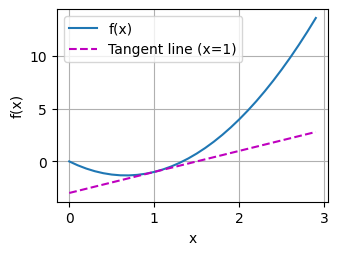

In [15]:
import numpy as np
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


## 2.4.2 偏导数
- 微分思想可从一元函数推广到 **多元函数（multivariate function）** 。
- 设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数。
- $y$关于第$i$个参数$x_i$的**偏导数（partial derivative）** 为：
$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

- 为了计算$\frac{\partial y}{\partial x_i}$，
可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，
并计算$y$关于$x_i$的导数。
- 对于偏导数的表示，以下是等价的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

- **示例：**
  - 使用sympy计算导数

In [16]:
import sympy as sp

# 定义两个符号变量x和y，这样我们可以用它们表示函数表达式
x, y = sp.symbols('x y')

# 定义一个多元函数f(x, y) = x^2 + y^2 + 3xy，使用定义的符号变量x和y
function = x**2 + y**2 + 3*x*y

# 使用sp.diff()方法计算函数关于x的偏导数，传入函数和要求偏导的变量x
# diff是differentiate的缩写
partial_derivative_x = sp.diff(function, x)

# 使用sp.diff()方法计算函数关于y的偏导数，传入函数和要求偏导的变量y
partial_derivative_y = sp.diff(function, y)

# 打印关于x和y的偏导数结果
print("函数关于x的偏导数:", partial_derivative_x)
print("函数关于y的偏导数:", partial_derivative_y)

# 定义一个字典，包含我们要评估偏导数的特定点（x=1，y=2）
point = {x: 1, y: 2}

# 使用subs()方法分别将特定点的值替换到关于x和y的偏导数表达式中，并计算结果
partial_derivative_x_value = partial_derivative_x.subs(point)
partial_derivative_y_value = partial_derivative_y.subs(point)

# 打印在特定点（x=1，y=2）处关于x，y的偏导数值
print("函数在(1, 2)处关于x的偏导数值:", partial_derivative_x_value)
print("函数在(1, 2)出关于y的偏导数值:", partial_derivative_y_value)


函数关于x的偏导数: 2*x + 3*y
函数关于y的偏导数: 3*x + 2*y
函数在(1, 2)处关于x的偏导数值: 8
函数在(1, 2)出关于y的偏导数值: 7


- **示例：**
  - 使用pytorch计算导数

In [17]:
# 定义函数
import torch
def function(x, y):
    return x**2 + y**2 + 3*x*y

# x,y赋值
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

# 生成函数并调用反向传播
output = function(x, y)
output.backward()
# 取得梯度，即x和y的偏导数
partial_derivative_x = x.grad
partial_derivative_y = y.grad

print("函数关于x的偏导数:", partial_derivative_x)
print("函数关于y的偏导数:", partial_derivative_y)


函数关于x的偏导数: tensor(8.)
函数关于y的偏导数: tensor(7.)


## 2.4.3 梯度
- 将多元函数对其所有变量的偏导数**连接成一个向量**，就得到该函数的**梯度（gradient）向量**。
- 设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是
一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。
  函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:
$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$
  - 其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。
- 假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

  * 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
  * 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
  * 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
  * $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

- 同样，对于任何矩阵$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。
- **示例：对上述各梯度公式使用sympy编程实现举例**

In [18]:
import sympy as sp

# 定义符号变量
a11, a12, a21, a22 = sp.symbols('a11 a12 a21 a22')
x1, x2 = sp.symbols('x1 x2')

# 定义矩阵和向量
A = sp.Matrix([[a11, a12], [a21, a22]])
x = sp.Matrix([x1, x2])

# a) ∇_x (Ax) = A^T
def grad_Ax():
    Ax = A * x
    return Ax.jacobian(x).T

# b) ∇_x (x^T A) = A
def grad_xTA():
    xTA = x.T * A
    return xTA.jacobian(x).T

# c) ∇_x (x^T A x) = (A + A^T)x
def grad_xTAx():
    xTAx = x.T * A * x
    return xTAx.jacobian(x).T

# d) ∇_x ||x||^2 = ∇_x (x^T x) = 2x
def grad_x_norm_squared():
    x_norm_squared = x.T * x
    return x_norm_squared.jacobian(x).T


# e) ∇_X ||X||_F^2 = 2X
x11, x12,x21,x22 = sp.symbols('x11 x12 x21 x22')
def grad_X_frobenius_norm_squared():
    X = sp.Matrix([[x11, x12], [x21, x22]])  # 使用x1, x2作为矩阵X的元素
    X_frobenius_norm_squared = sum(X.applyfunc(lambda x: x**2))
    return sp.Matrix([[sp.diff(X_frobenius_norm_squared, x11), sp.diff(X_frobenius_norm_squared, x12)],
                      [sp.diff(X_frobenius_norm_squared, x21), sp.diff(X_frobenius_norm_squared, x22)]])
    

# 打印结果
print("a) ∇_x (Ax) = A^T:")
print(grad_Ax())

print("\nb) ∇_x (x^T A) = A:")
print(grad_xTA())

print("\nc) ∇_x (x^T A x) = (A + A^T)x:")
print(grad_xTAx())

print("\nd) ∇_x ||x||^2 = ∇_x (x^T x) = 2x:")
print(grad_x_norm_squared())

print("\ne) ∇_X ||X||_F^2 = 2X:")
print(grad_X_frobenius_norm_squared())

a) ∇_x (Ax) = A^T:
Matrix([[a11, a21], [a12, a22]])

b) ∇_x (x^T A) = A:
Matrix([[a11, a12], [a21, a22]])

c) ∇_x (x^T A x) = (A + A^T)x:
Matrix([[2*a11*x1 + a12*x2 + a21*x2], [a12*x1 + a21*x1 + 2*a22*x2]])

d) ∇_x ||x||^2 = ∇_x (x^T x) = 2x:
Matrix([[2*x1], [2*x2]])

e) ∇_X ||X||_F^2 = 2X:
Matrix([[2*x11, 2*x12], [2*x21, 2*x22]])


- 注意：梯度对于设计深度学习中的**优化算法**有很大用处。
  - 比如**梯度下降**、**随机梯度下降**和**小批量随机梯度下降**等算法都是使用梯度实现的。
- **举例：**
  - 梯度下降算法求多元函数最小值

In [19]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize

# 定义一个二元二次函数f(x, y) = x^2 + y^2 + 4x + 6y + 7
x, y = sp.symbols('x y')
function = x**2 + y**2 + 4*x + 6*y + 7

# 使用SymPy计算函数关于x和y的偏导数
derivative_x = sp.diff(function, x) # differentiate微分的缩写
derivative_y = sp.diff(function, y)
# 将偏导数的SymPy表达式转换为可计算的NumPy函数
derivative_x_np = sp.lambdify((x, y), derivative_x)
derivative_y_np = sp.lambdify((x, y), derivative_y)
derivative_x, derivative_y

(2*x + 4, 2*y + 6)

In [20]:
type(x),type(derivative_x),type(derivative_x_np)

(sympy.core.symbol.Symbol, sympy.core.add.Add, function)

In [21]:
# 定义梯度下降函数
def gradient_descent(derivative_x_func, derivative_y_func, initial_point, learning_rate, num_iterations):
    point_current = np.array(initial_point)
    
    for _ in range(num_iterations):
        gradient_x = derivative_x_func(point_current[0], point_current[1])
        gradient_y = derivative_y_func(point_current[0], point_current[1])
        point_current -= learning_rate * np.array([gradient_x, gradient_y])
        
    return point_current

# 使用梯度下降算法寻找函数的最小值
initial_point = [0.1, 0.1]
learning_rate = 0.01
num_iterations = 1000
min_point = gradient_descent(derivative_x_np, derivative_y_np, initial_point, learning_rate, num_iterations)

# 使用SciPy检查答案的正确性
result = minimize(lambda p: p[0]**2 + p[1]**2 + 4*p[0] + 6*p[1] + 7, initial_point)

print(f"梯度下降找到的最小值点：(x, y) = ({min_point[0]}, {min_point[1]})")
print(f"SciPy找到的最小值点：(x, y) = ({result.x[0]}, {result.x[1]})")

梯度下降找到的最小值点：(x, y) = (-1.9999999964657689, -2.9999999947828013)
SciPy找到的最小值点：(x, y) = (-2.0000001368043407, -2.999999946697939)


## 2.4.4 链式法则
- 在深度学习中，多元函数通常是**复合（composite）** 的，此时可使用 **链式法则（Chain Rule）** 微分复合函数。
- 复合函数是指：一个函数的输出作为另一个函数的输入，形成一个新的函数
- 假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$
- 更一般的场景，即函数具有任意数量的变量的情况。

- 假设可微分函数$y$有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。
  - 注意，$y$是$x_1, x_2， \ldots, x_n$的函数。
  - 对于任意$i = 1, 2, \ldots, n$，链式法则给出：
$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$

- **示例：**
  - 使用链式法则求单变量复合函数偏导数，最后求复合函数在x=2处导数值。
  - 首先定义基本的函数及其导数，然后使用链式法则将这些基本函数组成一个复合函数。
  - 以下三个基本函数：
    - $f(x) = x^2$
    - $g(x) = sin(x)$
    - $h(x) = e^x$
  - 上述三个函数的导数：
    - $f'(x) = 2x$
    - $g'(x) = cos(x)$
    - $h'(x) = e^x$
  - 构造一个复合函数 $F(x) = f(g(h(x)))$。
    -  $F(x) = (\sin(e^x))^2$
  - 计算$ F'(x)$，然后应用链式法则求导：
    - $F'(x) = f'(g(h(x))) * g'(h(x)) * h'(x) = 2 \sin(e^x) \cdot \cos(e^x) \cdot e^x $

In [22]:
import math

# 定义基本函数 f(x) = x^2 及其导数 df(x) = 2x
def f(x):
    return x**2

def df(x):
    return 2 * x

# 定义基本函数 g(x) = sin(x) 及其导数 dg(x) = cos(x)
def g(x):
    return math.sin(x)

def dg(x):
    return math.cos(x)

# 定义基本函数 h(x) = e^x 及其导数 dh(x) = e^x
def h(x):
    return math.exp(x)

def dh(x):
    return math.exp(x)

# 定义复合函数 F(x) = f(g(h(x)))
def F(x):
    return f(g(h(x)))

# 计算 F'(x)，使用链式法则
def dF(x):
    # 使用链式法则: F'(x) = f'(g(h(x))) * g'(h(x)) * h'(x)
    # 分别计算 f'(g(h(x)))，g'(h(x)) 和 h'(x) 的值
    df_val = df(g(h(x)))
    dg_val = dg(h(x))
    dh_val = dh(x)

    # 将这些值相乘以得到 F'(x)
    return df_val * dg_val * dh_val

# 计算 x = 2 处的导数值
x_value = 2
derivative_at_x_2 = dF(x_value)
print(f"F'(2) = {derivative_at_x_2}")


F'(2) = 5.922556760236492


In [7]:
# 使用sympy计算F(x)的导数
import sympy as sp
x = sp.symbols('x')
F_x = sp.sin(sp.exp(x))**2
dF = F_x.diff(x)
print('F_x导函数为：', dF,'\n在x=2处的导数为：', dF.subs({x:2.0}).evalf())

F_x微分函数为： 2*exp(x)*sin(exp(x))*cos(exp(x)) 
在x=2处的导数为： 5.92255676023649


### 2.4.5 雅克比矩阵

- **雅克比矩阵（Jacobian matrix）** 是一个矩阵，表示一组向量函数相对于其自变量的**偏导数**。

- 雅克比矩阵在多元函数求导和优化问题中起着关键作用，可以用来描述多元函数**局部线性变化**的速度。
- 设有**向量函数** $f: R^n → R^m$，其中$ n$ 是输入变量的数量，$m$ 是输出函数的数量。
- 雅克比矩阵$J(x)$ 是一个 $m×n$ 矩阵，其第 $i$ 行、$j$ 列的元素表示第$ i$ 个输出函数关于第 $j $个输入变量的偏导数：
 $$J(x) = [∂f_i(x)/∂x_j] (i = 1, 2, ..., m; j = 1, 2, ..., n)$$
 即$$J(x) = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}$$
- 雅克比矩阵在深度学习中的用途：
  - 在**优化问题**中，雅克比矩阵可以**提供梯度下降算法或牛顿法等求解算法所需的导数信息**。 

- **示例：**
  - 定义两个符号变量 $x$ 和$ y$。
  - 定义一个由两个函数组成的向量函数 $f(x, y)$。
  - 使用`jacobian()` 函数计算向量函数的雅克比矩阵。

In [23]:
import sympy as sp

# 定义变量
x, y = sp.symbols('x y')

# 定义向量函数 f(x, y) = (x^2 + y^2, x*y)
f1 = x**2 + y**2
f2 = x * y
f = sp.Matrix([f1, f2])

# 计算雅克比矩阵
J = f.jacobian([x, y])

# 显示结果
print("雅克比矩阵:")

# 通俗理解：行为函数，列是变量
# 即每一行是某个特定函数关于多个自变量的偏导数
sp.pprint(J)

雅克比矩阵:
⎡2⋅x  2⋅y⎤
⎢        ⎥
⎣ y    x ⎦


- **雅克比矩阵在牛顿法中的应用**
  - 从初始猜测值开始，利用函数的导数**构造切线**，切线与 x 轴的交点作为下一个猜测值，不断迭代直到找到函数的根。
  - 使用牛顿法求解非线性方程组。
  - 对于优化问题，需要修改目标函数为需要最小化的函数，并相应地调整雅克比矩阵
  - 在优化问题中，雅克比矩阵的转置矩阵就是**目标函数的梯度**。
- 牛顿法求解一元函数（方程）的步骤：
  - **初始猜测值**：选择一个初始猜测值 $ x_0 $。
  - **迭代公式**：利用迭代公式计算新的猜测值：
    $$
    x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
    $$
   其中 $ f(x) $ 是目标函数，$ f'(x) $ 是 $ f(x) $ 的导数。
  * **收敛条件**：如果 $ |f(x_{n+1})| $ 或 $ |x_{n+1} - x_n| $ 小于预设的阈值 $ \epsilon $，则认为算法收敛，返回 $ x_{n+1} $ 作为函数的根。
- 牛顿法求解多元函数(方程)的步骤：
  * **初始猜测值**：选择一个初始猜测值 $ \mathbf{x}_0 $。
  * **迭代公式**：利用迭代公式计算新的猜测值：
    $$
    \mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n) \mathbf{f}(\mathbf{x}_n)
    $$
    其中 $ \mathbf{f}(\mathbf{x}) $ 是目标函数向量，$ J(\mathbf{x}) $ 是雅可比矩阵。
  * **收敛条件**：如果 $ \|\mathbf{f}(\mathbf{x}_{n+1})\| $ 或 $ \|\mathbf{x}_{n+1} - \mathbf{x}_n\| $ 小于预设的阈值 $ \epsilon $，则认为算法收敛，返回 $ \mathbf{x}_{n+1} $ 作为方程组的解。
* **示例：使用牛顿法求解以下非线性方程组：**
  $$
  \begin{cases}
  x^2 + y^2 - 1 = 0 \\
  x - y = 0
  \end{cases}
  $$

In [24]:
import numpy as np

def newton_method(f, jacobian, x0, epsilon=1e-5, max_iter=100):
    """
    牛顿法实现
    
    参数:
    f: 目标函数,返回一个numpy数组
    jacobian: 雅可比矩阵函数,返回一个2D numpy数组
    x0: 初始猜测值,numpy数组
    epsilon: 收敛阈值
    max_iter: 最大迭代次数
    
    返回:
    x: 最优解
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        # 通过收敛阈值epsilon判定是否收敛
        if np.linalg.norm(fx) < epsilon:
            print(f"收敛于迭代 {i}")
            return x
        
        J = jacobian(x)
        # 求解线性方程组 J * delta = -fx
        delta = np.linalg.solve(J, -fx)
        # 更新解
        x = x + delta
    
    print("达到最大迭代次数")
    return x

# 示例: 求解方程组 f(x,y) = [x^2 + y^2 - 1, x - y]

def f(x):
    return np.array([x[0]**2 + x[1]**2 - 1, x[0] - x[1]])

def jacobian(x):
    
    return np.array([[2*x[0], 2*x[1]], 
                     [1, -1]])

# 初始化
x0 = np.array([2.0, 2.0])

# 运行牛顿法
solution = newton_method(f, jacobian, x0)

print("解:", solution)
print("f(x) =", f(solution))

收敛于迭代 5
解: [0.70710678 0.70710678]
f(x) = [2.14730012e-10 0.00000000e+00]


- **牛顿法在优化问题中的应用**：
  - 基本原理：对于一元函数 $f(x)$,牛顿法的基本思想是利用函数在当前点的泰勒展开来近似函数,然后求解这个近似函数的极值点。
  - 函数 $f(x)$ 在点 $x_k$ 处的二阶泰勒展开为:
    $f(x) \approx f(x_k) + f'(x_k)(x-x_k) + \frac{1}{2}f''(x_k)(x-x_k)^2$
  - 令这个近似函数的导数为0,可以得到下一个迭代点:$x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$
  - 多变量情况：
    - 对于多变量函数 $f(\mathbf{x})$,其中 $\mathbf{x} \in \mathbb{R}^n$,牛顿法的迭代公式为:
    $\mathbf{x}_{k+1} = \mathbf{x}_k - [\mathbf{H}f(\mathbf{x}_k)]^{-1}\nabla f(\mathbf{x}_k)$
    其中,$\nabla f(\mathbf{x}_k)$ 是函数在 $\mathbf{x}_k$ 处的梯度,$\mathbf{H}f(\mathbf{x}_k)$ 是函数在 $\mathbf{x}_k$ 处的海森矩阵。

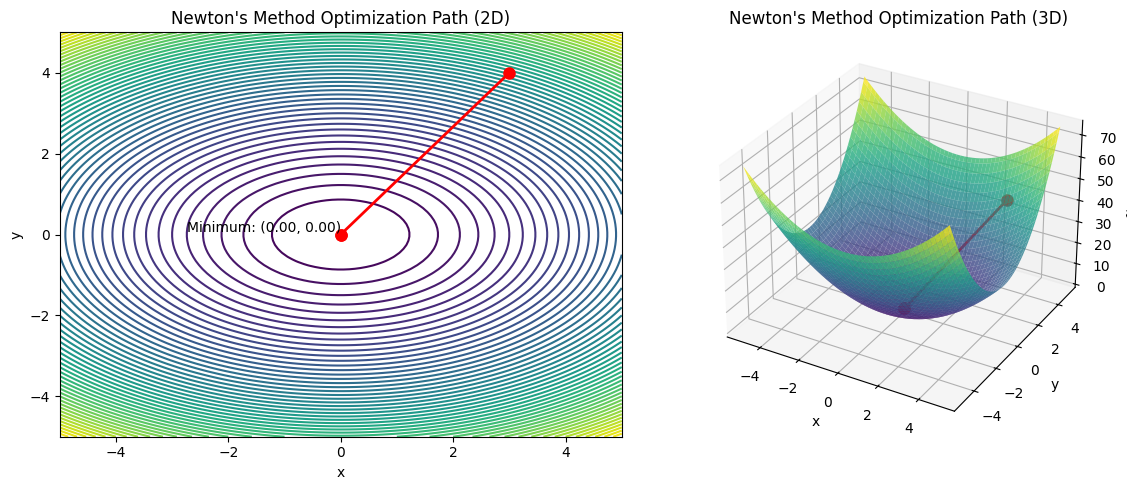

最小值点: x = 0.000000, y = 0.000000
最小值: f(x, y) = 0.000000


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 目标函数
def f(x, y):
    return x**2 + 2*y**2 
    
# 目标函数的梯度
def gradient(x, y):
    return np.array([2*x, 4*y])

# 目标函数的海森矩阵
def hessian(x, y):
    return np.array([[2, 0],
                     [0, 4]])

#牛顿法实现函数
def newton_method(start_point, max_iter=100, tol=1e-6):
    x, y = start_point
    path = [start_point]
    
    for i in range(max_iter):
        grad = gradient(x, y)
        hess = hessian(x, y)
        
        delta = np.linalg.solve(hess, grad)
        x_new, y_new = np.array([x, y]) - delta
        
        path.append([x_new, y_new])
        
        if np.linalg.norm(delta) < tol:
            break
        
        x, y = x_new, y_new
    
    return np.array(path), f(x, y)

# 运行牛顿法
start_point = [3, 4]
path, min_value = newton_method(start_point)

# 准备数据
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 创建一个包含两个子图的图形
fig = plt.figure(figsize=(12, 5))

# 2D等高线图
ax1 = fig.add_subplot(121)
contour = ax1.contour(X, Y, Z, levels=50)
ax1.plot(path[:, 0], path[:, 1], 'ro-', linewidth=2, markersize=8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Newton\'s Method Optimization Path (2D)')
ax1.text(path[-1, 0], path[-1, 1], f'Minimum: ({path[-1, 0]:.2f}, {path[-1, 1]:.2f})', 
         verticalalignment='bottom', horizontalalignment='right')

# 3D曲面图
ax2 = fig.add_subplot(122, projection='3d')
surface = ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax2.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.set_title('Newton\'s Method Optimization Path (3D)')

plt.tight_layout()
plt.show()

print(f"最小值点: x = {path[-1, 0]:.6f}, y = {path[-1, 1]:.6f}")
print(f"最小值: f(x, y) = {min_value:.6f}")


In [26]:
x.shape,10/99,x

((100,),
 0.10101010101010101,
 array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
        -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
        -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
        -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
        -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
        -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
        -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
        -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
        -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
        -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
         0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
         0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
         1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
         1.56565657,

In [27]:
path

array([[3., 4.],
       [0., 0.],
       [0., 0.]])

## 小结

* 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。
* 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。
* 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。
* 链式法则使我们能够微分复合函数。
